### BƯỚC 1: DỊCH RA TIẾNG ANH (DÙNG CÁCH 1)

In [3]:
from googletrans import Translator
import googletrans
import json
import pandas as pd
import numpy as np

from mtranslate import translate
translate = Translator()

# List all languages
# print(json.dumps(googletrans.LANGUAGES, indent=4))

In [ ]:
df = pd.read_excel('C:\\Users\\vinh.nt2\\Downloads\\Comment_Analysis\\Data\\Data training\\Data_traing_comment\\train_category_update_full_update_2.xlsx')
df

In [6]:
df.dropna(subset=['comment_eng'], inplace=True)
df = df.reset_index(drop=True)
comments = df['comment_eng']
df

,Unnamed: 0,id,content_comments,comment_eng,sentiment,category,Unnamed: 6
0,0,0.0,Thay đổi cmt tăng 1 size. Hãy làm như bạn muốn...,Change the cmt to increase 1 size. Please do a...,0.0,NaN,NaN
1,1,1.0,quần dày\nMỗi lần size nhỏ nhắn tin shop đổi s...,"thick pants\nEvery time the size is small, mes...",0.0,"Sản phẩm và chất lượng, Trải nghiệm, Phản hồi ...",NaN
2,2,2.0,Đã nhận được hàng...shop đóng gói nhanh...đúng...,Received the goods...shop packaged quickly...r...,1.0,"Sản phẩm và chất lượng, Trải nghiệm, Đóng gói ...",NaN
3,3,3.0,Đã nhận được hàng...shop đóng gói nhanh...đúng...,Received the goods...shop packaged quickly...r...,1.0,"Sản phẩm và chất lượng, Trải nghiệm, Đóng gói ...",NaN
4,4,4.0,Hình ảnh nhận xu và quan đơn giản thôi nhé...\...,The picture of receipt of coin and quan is sim...,0.0,"Trải nghiệm, Khác, Đóng gói và giao hàng",NaN
...,...,...,...,...,...,...,...
1035,1035,1035.0,"Tôi thề! Quần không giống ảnh chút nào, đúng l...",I swear! The pants don't look like the picture...,0.0,"Sản phẩm và chất lượng, Trải nghiệm, Khác, Đón...",NaN
1036,1036,1036.0,Xấu từ thiết kế đến đường may. Khác với ảnh sh...,Ugly from design to seams. Different from the ...,0.0,"Trải nghiệm, Khác",NaN
1037,1037,1037.0,Chất lượng sản phẩm kém nên mọi người để ý nhé...,The product quality is so poor that people pay...,0.0,"Sản phẩm và chất lượng,",NaN
1038,1038,1038.0,Hàng rất khác so với ảnh mẫu và mô tả,Goods are very different from sample photos an...,0.0,"Sản phẩm và chất lượng, Trải nghiệm, Khác",NaN


In [8]:
comments = df['comment_eng']
comments

0       Change the cmt to increase 1 size. Please do a...
1       thick pants\nEvery time the size is small, mes...
2       Received the goods...shop packaged quickly...r...
3       Received the goods...shop packaged quickly...r...
4       The picture of receipt of coin and quan is sim...
                              ...                        
1035    I swear! The pants don't look like the picture...
1036    Ugly from design to seams. Different from the ...
1037    The product quality is so poor that people pay...
1038    Goods are very different from sample photos an...
1039    Ugly from design to seams. Different from the ...
Name: comment_eng, Length: 1040, dtype: object

In [11]:
comment_engs = pd.Series()

In [35]:
comments[8725]

'No Return/Refund if customer is not satisfied'

In [12]:
from mtranslate import translate
for idx, comment in enumerate(comments):
    # define a translate object
    # Translate some text
    english_translation = translate(comment, 'en')
    comment_engs[idx] = english_translation

In [14]:
df['comment_eng'] = comment_engs

### BƯỚC 2. PREPROCESSING

In [9]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [10]:
def process_tweet(tweet):
    
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and
                word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)

    return tweets_clean

In [11]:
import numpy as np

def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()

    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [12]:
def freq_sentence(keys):
    data_freq = []
    for word in keys:
    
        pos = 0
        neg = 0
        
        if (word, 1) in freqs:
            pos = freqs[(word, 1)]
            
        if (word, 0) in freqs:
            neg = freqs[(word, 0)]
            
        data_freq.append([word, pos, neg])
    return data_freq

# BƯỚC 3: LOGISTIC REGRESSION

In [13]:
import nltk
from os import getcwd
import pandas as pd
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt
import numpy as np

### TẠO DỮ LIỆU TRAIN TỪ TWEETS

In [ ]:
tweets = pd.read_excel('C:\\Users\\vinh.nt2\\Downloads\\Comment_Analysis\\Data\\Data training\\Data_traing_comment\\train_category_update_full_update_2.xlsx')
tweets

In [173]:
tweets.dropna(subset=['comment_eng'], inplace=True)
tweets = tweets.reset_index(drop=True)

In [174]:
comments = tweets['comment_eng']
sentiments = tweets['sentiment']

In [ ]:
tweets

In [176]:
tweets = tweets.rename(columns={'comment': 'tweets_comments', 'sentiment_manual': 'sentiment'})

In [177]:
all_positive_tweets = tweets.loc[tweets['sentiment'] == 1]
all_negative_tweets = tweets.loc[tweets['sentiment'] == 0]

In [178]:
all_positive_tweets = all_positive_tweets['comment_eng']
all_negative_tweets = all_negative_tweets['comment_eng']

In [179]:
len(all_positive_tweets)

561

In [180]:
all_positive_tweets = all_positive_tweets.to_list()
all_negative_tweets = all_negative_tweets.to_list()

labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

tweets = all_positive_tweets + all_negative_tweets

freqs = build_freqs(tweets, labels)

print(f'type(freqs) = {type(freqs)}')

print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 2102


In [181]:
def create_data():
    df_ = pd.DataFrame(columns=['idx', 'bias', 'positive', 'negative', 'sentiment'])
    for idx, tweet in enumerate(all_positive_tweets):
        list_freq = freq_sentence(process_tweet(tweet))
        positive_ = 0
        negative_ = 0
        for i in list_freq:
            positive_ += i[1]
            negative_ += i[2]
        new_row = {'idx': idx, 'bias': 1, 'positive': positive_, 'negative': negative_, 'sentiment': 1}
        df_.loc[len(df_)] = new_row
    for idx, tweet in enumerate(all_negative_tweets):
        list_freq = freq_sentence(process_tweet(tweet))
        positive_ = 0
        negative_ = 0
        for i in list_freq:
            positive_ += i[1]
            negative_ += i[2]
        new_row = {'idx': idx, 'bias': 1, 'positive': positive_, 'negative': negative_, 'sentiment': 0}
        df_.loc[len(df_)] = new_row
    return df_

In [182]:
# Hình thành nên tập train
data_train = create_data()

In [ ]:
data_train

### DỮ LIỆU CẦN SENTIMENT

In [184]:
df = pd.read_excel('C:\\Users\\vinh.nt2\\Downloads\\test_data.xlsx')

df.dropna(subset=['comment'], inplace=True)
df__ = df.copy()

comments = df['comment']

In [185]:
comments

0     giao hàng nhanh, đóng gói kĩ, mua ở shop lần 3...
1     Giao hàng nhanh chóng, kịp thời. Hàng shop chu...
2     Shop giao hàng rất nhanh mua hôm trước hôm sau...
3     giao hàng nhanh, đóng gói kĩ, shop trả lại tin...
4     Hàng shop mall nên an tâm về chất lượng, date ...
                            ...                        
83           Rách thùng, ko cho dc cái thùng đàng hoàng
84                            Chăm sóc khách hàng dở tệ
85                                      Đóng gói quá tệ
86    Mall gì mà đóg gói sp quấn ko nổi được lớp chố...
87               Đóng gói sơ sài. K bọc chống sốc luôn.
Name: comment, Length: 88, dtype: object

In [ ]:
from mtranslate import translate
for idx, comment in enumerate(comments):
    english_translation = translate(comment, 'en')
    comments[idx] = english_translation

In [187]:
def create_data_prediction():
    df_ = pd.DataFrame(columns=['idx', 'bias', 'positive', 'negative'])
    for idx, comment in enumerate(comments):
        list_freq = freq_sentence(process_tweet(comment))
        positive_ = 0
        negative_ = 0
        for i in list_freq:
            positive_ += i[1]
            negative_ += i[2]
        new_row = {'idx': idx, 'bias': 1, 'positive': positive_, 'negative': negative_}
        df_.loc[len(df_)] = new_row
    return df_

In [188]:
# Hình thành nên tập predict
data_prediction = create_data_prediction()

In [ ]:
data_prediction

# TRAIN VÀ TEST MÔ HÌNH LOGISTICREGRESSION

In [190]:
X = data_train.iloc[:, 1:-1]
y = data_train.iloc[:, -1]

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [192]:
from imblearn.over_sampling import SMOTE

# Khởi tạo đối tượng SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print("Số lượng mẫu trước khi áp dụng SMOTE:")
print(f"Negative: {sum(Y_train == 0)}, Positive: {sum(Y_train == 1)}")

print("\nSố lượng mẫu sau khi áp dụng SMOTE:")
print(f"Negative: {sum(Y_train_resampled == 0)}, Positive: {sum(Y_train_resampled == 1)}")

Số lượng mẫu trước khi áp dụng SMOTE:
Negative: 344, Positive: 384

Số lượng mẫu sau khi áp dụng SMOTE:
Negative: 384, Positive: 384


In [193]:
from sklearn.linear_model import LogisticRegression
models = LogisticRegression()
models.fit(X_train, Y_train)

LogisticRegression()

In [194]:
predictions = models.predict(X_val)

Classification Report:  LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       135
           1       0.93      0.89      0.91       177

    accuracy                           0.90       312
   macro avg       0.90      0.90      0.90       312
weighted avg       0.90      0.90      0.90       312

ROC_AUC_SCORE is  0.9027620841180164


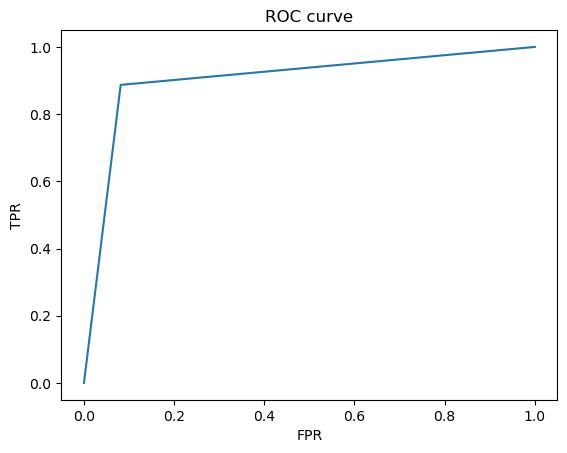

<Axes: >

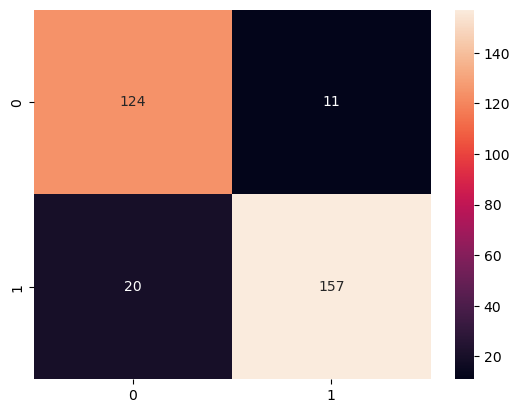

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score, classification_report, roc_curve, confusion_matrix
import seaborn as sns

accuracy = accuracy_score(predictions, Y_val)
precision = precision_score(predictions, Y_val)
recall = recall_score(predictions, Y_val)
Y_predict = models.predict(X_val)
auc = roc_auc_score(Y_val, Y_predict)
print('Classification Report: ', 'LogisticRegression')
print(classification_report(Y_val, predictions))
false_position_rate, true_position_rate, thresholds = roc_curve(Y_val, predictions)
print('ROC_AUC_SCORE is ', roc_auc_score(Y_val, predictions))

plt.plot(false_position_rate, true_position_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
sns.heatmap(confusion_matrix(Y_val, predictions), fmt = '', annot = True)

# PREDICTION

In [196]:
X_predict = data_prediction.iloc[:, 1:]
X_predict

,bias,positive,negative
0,1,1180,499
1,1,786,296
2,1,609,472
3,1,655,223
4,1,825,420
...,...,...,...
83,1,34,54
84,1,11,34
85,1,65,93
86,1,476,423


In [197]:
models.fit(X, y)

LogisticRegression()

In [203]:
from joblib import dump, load
dump(models, 'sentiment_garment.joblib')

['sentiment_garment.joblib']

In [121]:
models = load('model.joblib')

In [198]:
Y_predict = models.predict(X_predict)
probabilities = models.predict_proba(X_predict)[:, 1]  # Xác suất nhãn 1 (positive class)

In [199]:
probabilities

array([0.99534694, 0.98060055, 0.09680929, 0.97225983, 0.87255938,
       0.99049307, 0.31540567, 0.22758762, 0.70820207, 0.44169051,
       0.76870792, 0.26032868, 0.25758789, 0.22758762, 0.23378041,
       0.19940937, 0.23151973, 0.90264388, 0.33927414, 0.88374292,
       0.9982834 , 0.95827271, 0.30803964, 0.45291663, 0.96741207,
       0.99961517, 0.27052978, 0.8979109 , 0.46852065, 0.99100959,
       0.99453678, 0.89494652, 0.99949342, 0.52359925, 0.58018954,
       0.99268133, 0.30870729, 0.9937183 , 0.9955414 , 0.84937176,
       0.90359579, 0.98426648, 0.99712005, 0.9747419 , 0.99594585,
       0.75849809, 0.9547028 , 0.99341673, 0.96997685, 0.91797289,
       0.79831334, 0.74852018, 0.86921673, 0.91950656, 0.96682477,
       0.98949053, 0.98754749, 0.96589562, 0.9297403 , 0.99204394,
       0.99752537, 0.91328942, 0.99819827, 0.96809954, 0.99435194,
       0.99930823, 0.97242759, 0.37568329, 0.99983027, 0.9947578 ,
       0.70464734, 0.84421708, 0.34758593, 0.66388354, 0.11217

In [200]:
Y_predict

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [201]:
accuracy = accuracy_score(df['sentiment'], Y_predict)

In [202]:
accuracy

0.7613636363636364

In [112]:
df['sentiment_logistic'] = probabilities
df['sentiment_logistic_1'] = Y_predict

In [113]:
df

,comment,sentiment,sentiment_logistic,sentiment_logistic_1
0,"Fast delivery, carefully packaged, 3rd time bu...",1,0.999104,1
1,"Fast and timely delivery. Standard shop goods,...",1,0.995199,1
2,"The shop delivered very quickly, ordered yeste...",1,0.576688,1
3,"Fast delivery, carefully packaged, the shop re...",1,0.994631,1
4,Mall shop products so you can rest assured abo...,1,0.974614,1
...,...,...,...,...
83,"Torn box, can't get a decent box",0,0.208697,0
84,Terrible customer service,0,0.320175,0
85,Packaging is so bad,0,0.367767,0
86,What kind of mall is this that the product pac...,0,0.170033,0


In [114]:
df.to_excel('predict_test_sentiment_split.xlsx')

In [70]:
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)